In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [72]:
data = pd.DataFrame(iris.data, columns=iris['feature_names'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Sepal width and petal width')

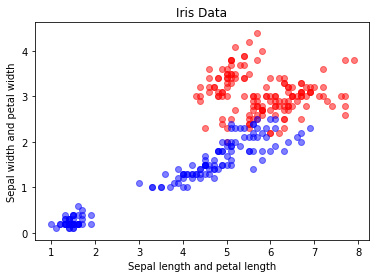

In [25]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],c ='red',alpha= 0.5)
plt.scatter(data['petal length (cm)'], data['petal width (cm)'],c ='blue',alpha = 0.5)

plt.title('Iris Data')
plt.xlabel('Sepal length and petal length')
plt.ylabel('Sepal width and petal width')

In [27]:
from sklearn.cluster import KMeans


In [29]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_) 

Text(0, 0.5, 'SSE')

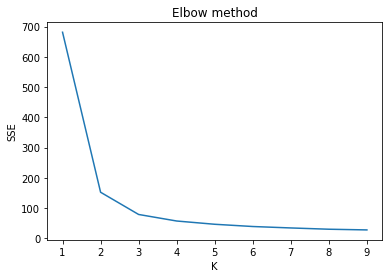

In [32]:
plt.plot(k_rng,sse)
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('SSE')

In [38]:
#from graph it's clear that there are 2 cluster
kmeans = KMeans(n_clusters= 3)

y_predict = kmeans.fit_predict(data)
data['Cluster'] = y_predict


In [55]:
 #index of setosa=0,versicolor =1, virginica= 2
df0 = data.loc[y_predict==0]
df1 = data.loc[y_predict==1]
df2 = data.loc[y_predict==2]

df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0


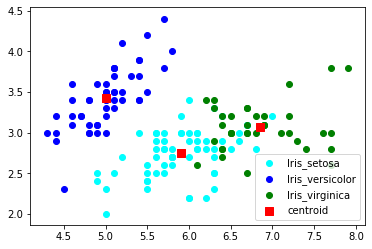

In [71]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], c= 'cyan', marker ='o', label = 'Iris_setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], c= 'blue', marker ='o', label = 'Iris_versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], c= 'green', marker ='o', label = 'Iris_virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 50, marker = "s", c = 'red', label = "centroid")

plt.legend()